In [12]:
import pandas as pd
df = pd.read_csv("/Users/maheshshirsath/Downloads/Machine_learning/spotify_analysis_dataset.csv")

print("Dataset Loaded Successfully")
print(df.head())


Dataset Loaded Successfully
  track_id track_name     artist     album release_date  duration_ms  \
0  TRK1000     Song 0   Artist 7   Album 3   2010-01-01       240151   
1  TRK1001     Song 1   Artist 4   Album 5   2010-01-02       253767   
2  TRK1002     Song 2  Artist 13  Album 19   2010-01-03       244375   
3  TRK1003     Song 3  Artist 11   Album 7   2010-01-04       299262   
4  TRK1004     Song 4   Artist 8   Album 9   2010-01-05       256330   

   popularity  danceability  energy  loudness  speechiness  acousticness  \
0          70         0.037   0.349     -2.87        0.522         0.616   
1          58         0.610   0.726    -22.87        0.770         0.635   
2          85         0.503   0.897     -1.33        0.216         0.045   
3          27         0.051   0.887     -1.46        0.623         0.375   
4          65         0.279   0.780     -5.88        0.085         0.626   

   instrumentalness  liveness  valence   tempo  
0             0.931     0.947    

Neural Network Prediction: 30.979921


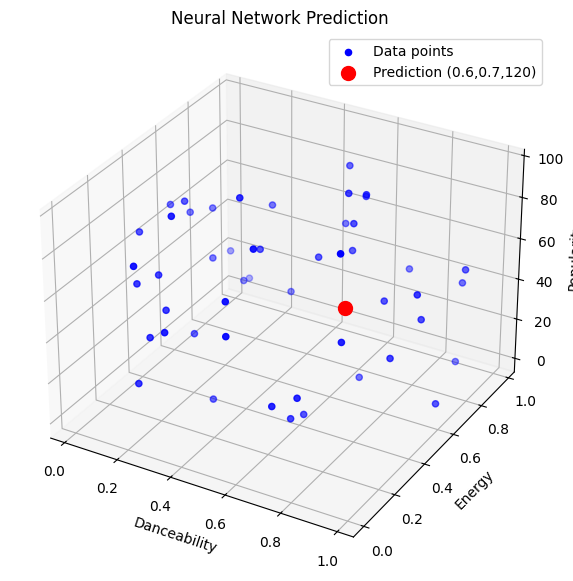

In [41]:
#Neural Networks:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X_nn = df[['danceability', 'energy', 'tempo']]
y_nn = df['popularity']


model = keras.Sequential([
    layers.Input(shape=(3,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_nn, y_nn, epochs=50, verbose=0)


test_input = np.array([[0.6, 0.7, 120]], dtype=np.float32)

prediction = model.predict(test_input, verbose=0)
print("Neural Network Prediction:", prediction[0][0])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_nn['danceability'], X_nn['energy'], y_nn, color='blue', label='Data points')
ax.scatter(test_input[0,0], test_input[0,1], prediction[0][0], color='red', s=100, label='Prediction (0.6,0.7,120)')
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
ax.set_zlabel('Popularity')
ax.set_title('Neural Network Prediction')
ax.legend()
plt.show()
